# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict credit quality for a number of student loans.

In [13]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [15]:
# Read in data
data = Path("../Resources/student_loans.csv")
df = pd.read_csv(data)
df

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [18]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 12ms/step - loss: 30.2758 - mse: 30.2758 - val_loss: 29.3851 - val_mse: 29.3851
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 27.5648 - mse: 27.5648 - val_loss: 26.6437 - val_mse: 26.6437
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 24.8391 - mse: 24.8391 - val_loss: 24.0081 - val_mse: 24.0081
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 22.0297 - mse: 22.0297 - val_loss: 21.3541 - val_mse: 21.3541
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 19.1564 - mse: 19.1564 - val_loss: 18.7134 - val_mse: 18.7134
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 16.3703 - mse: 16.3703 - val_loss: 16.2139 - val_mse: 16.2139
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 13.8160 - mse: 13.8160 - val_loss: 13.8713 - val_mse: 13.8713
Epoch 8/200
35/35 [==============================] - 0

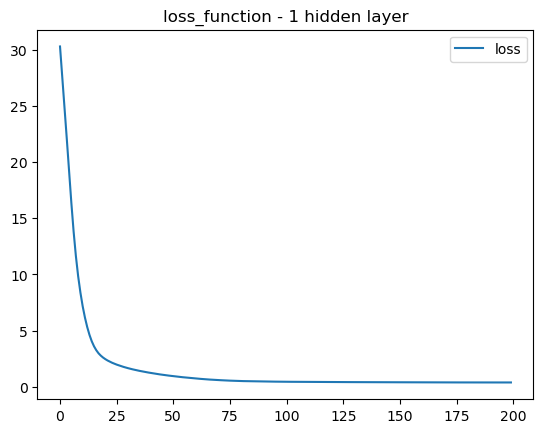

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 10ms/step - loss: 38.6957 - mse: 38.6957 - val_loss: 33.7385 - val_mse: 33.7385
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 31.5353 - mse: 31.5353 - val_loss: 28.9269 - val_mse: 28.9269
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 25.5816 - mse: 25.5816 - val_loss: 24.7570 - val_mse: 24.7570
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 20.5220 - mse: 20.5220 - val_loss: 21.2276 - val_mse: 21.2276
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 16.4763 - mse: 16.4763 - val_loss: 18.2950 - val_mse: 18.2950
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 13.4601 - mse: 13.4601 - val_loss: 15.8053 - val_mse: 15.8053
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 11.3013 - mse: 11.3013 - val_loss: 13.6179 - val_mse: 13.6179
Epoch 8/200
35/35 [==============================] - 0

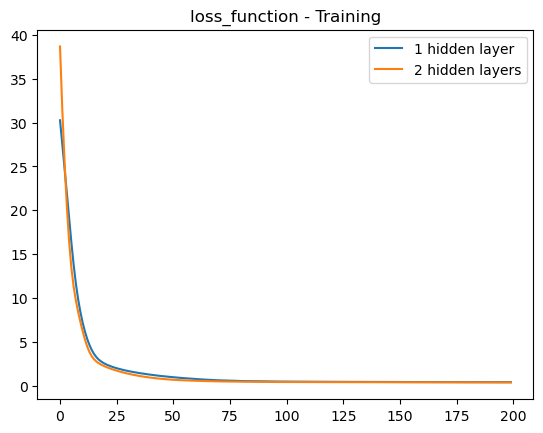

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

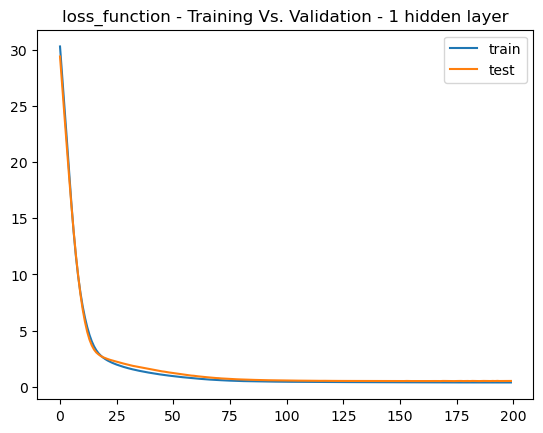

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

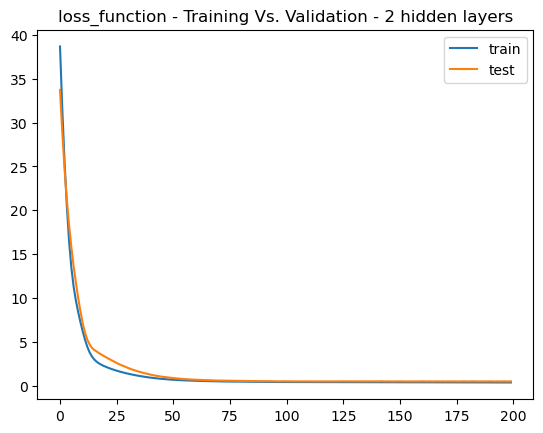

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()